In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')
%matplotlib inline
# 使用回归模型预测连续的结果

Text(0, 0.5, 'y')

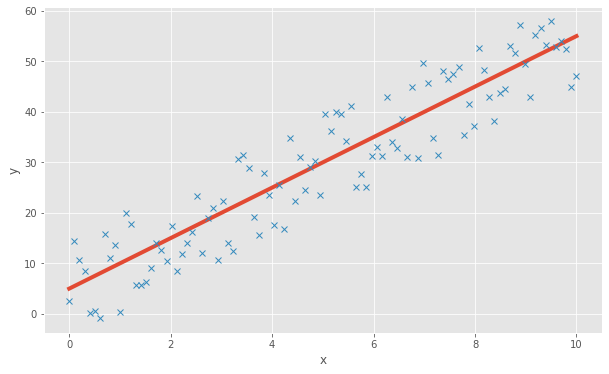

In [2]:
x = np.linspace(0,10,100)
y_hat = x*5+5
np.random.seed(42)
y = x*5 + 20*(np.random.rand(x.size) - 0.5)+5
plt.figure(figsize=(10, 6))
plt.plot(x, y_hat, linewidth=4)
plt.plot(x,y,'x')
plt.xlabel('x')
plt.ylabel('y')

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
distTypeOptions = [cv2.DIST_L2,\
                 cv2.DIST_L1,\
                 cv2.DIST_L12,\
                 cv2.DIST_FAIR,\
                 cv2.DIST_WELSCH,\
                 cv2.DIST_HUBER]
distTypeLabels = ['DIST_L2',\
                 'DIST_L1',\
                 'DIST_L12',\
                 'DIST_FAIR',\
                 'DIST_WELSCH',\
                 'DIST_HUBER']
colors = ['g','c','m','y','k','b']
points = np.array([(xi,yi) for xi,yi in zip(x_train,y_train)])

In [4]:
linreg = linear_model.LinearRegression()
linreg.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))

LinearRegression()

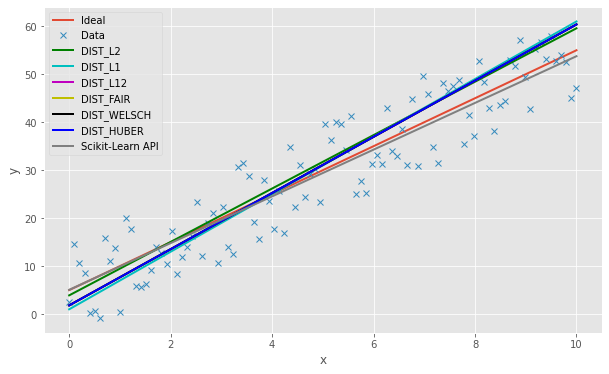

In [5]:
y_sklearn = linreg.predict(x.reshape(-1,1))
y_sklearn = list(y_sklearn.reshape(1,-1)[0])

plt.figure(figsize=(10, 6))
plt.plot(x, y_hat,linewidth=2,label='Ideal')
plt.plot(x,y,'x',label='Data')

for i in range(len(colors)):
    distType = distTypeOptions[i]
    distTypeLabel = distTypeLabels[i]
    c = colors[i]
    
    [vxl, vyl, xl, yl] = cv2.fitLine(np.array(points, dtype=np.int32), distType, 0, 0.01, 0.01)
    y_cv = [vyl[0]/vxl[0] * (xi - xl[0]) + yl[0] for xi in x]
    plt.plot(x,y_cv,c=c,linewidth=2,label=distTypeLabel)

plt.plot(x,list(y_sklearn),c='0.5', linewidth=2,label='Scikit-Learn API')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')